<a href="https://colab.research.google.com/github/YounesMes/Unit4-Project/blob/master/_1_Unit_4_Project_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 4 Project
After understanding how neural networks work, implementing some basic architectures using deep learning frameworks, and learning about some advanced techniques to help enhance our neural networks' models results, it's time to apply what you learned! So let's start

## Project Overview 
In this project, you will build a neural network model to classify images from CIFAR 10 dataset. 

The CIFAR-10 dataset consists of 60000 32x32 color images of 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. [source](https://www.cs.toronto.edu/~kriz/cifar.html)

Unlike the previous projects, there will be no code cells to fill, the only task you have is to build the best possible model using the techniques you learned about in this unit. But we will guide you with some directives.

You will have enough guidance throughout the project and your work will be reviewed and graded by a teacher assistant. You can also reach out to the TA via slack whenever you feel you are stuck.

## Some guidelines
- Please use text cells to write the questions' answers in a good way.
- Don't forget to save the different models you tested so you will be able to report the different results you got and the impact of the different techniques you tested later.

## Getting started
- In case you don't have a GPU, it is recommended that you use google colab. Start by cloning this repository, then open [google colab](https://colab.research.google.com/), click on File > Upload notebook, and finally upload the ```.ipynb``` file from the repository you have just cloned! Don't forget to change the runtime to GPU. If you want to work in your local environment just open it using jupyter notebook.



## Dataset 

1.   Load the dataset (**hint**: it's available here https://keras.io/api/datasets/)
2.   Display few images of each class.



In [1]:
#importing librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
%matplotlib inline
from matplotlib.pyplot import imshow
from tensorflow.keras import datasets, layers, Input,models
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from keras import regularizers
from tensorflow import keras
import os
import pickle as pk
import seaborn as sn
import io
import datetime
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
#importing the dataset
import ssl
ssl._create_default_https_context=ssl._create_unverified_context
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_train[:5]

#define the classes:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_simp(x,y,indx):
    plt.figure(figsize=(10,3))
    plt.imshow(x[indx])
    plt.xlabel(classes[y[indx]])

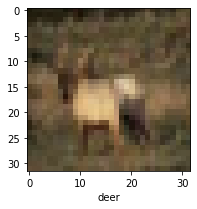

In [4]:
plot_simp(X_train,y_train,3)

## Baseline Model

1.   Build a basline model using only dense layers, activation function of your choice, and the adapted cost function for this problem.
2.   Train and evaluate your model
3.   Analyze the result



In [ ]:
# Your code here
X_train = X_train / 255.0
X_test = X_test / 255.0
model= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5792 - accuracy: 0.5637


[1.57919442653656, 0.5637000203132629]

**We got a precision of 91% in the training with 50 epochs, and 56% in the test samples. the neural network is performing bad in this task**

## Accelerating the training

1.   Add batch normalization layers to your network in order to accelerate the training. Start with adding batch norm layer before each of your activation layers.
2.   Analyze the new results
3.   Change the position of the batch norm layers so they will be after the activation layers. Compare the results.
   



In [ ]:
# before the activation layers
model_2= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(3000, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(1000, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(10, activation='sigmoid')    
    ])

model_2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7055 - accuracy: 0.4181
Epoch 2/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.3737 - accuracy: 0.5167
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2358 - accuracy: 0.5662
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1263 - accuracy: 0.6047
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0332 - accuracy: 0.6374
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9479 - accuracy: 0.6721
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8633 - accuracy: 0.7013
Epoch 8/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7900 - accuracy: 0.7288
Epoch 9/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7264 - accuracy: 0.7473
Epoch 10/50
1563/1563 [==============================] - 13s 8ms/step - l

In [ ]:
model_2.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.2586 - accuracy: 0.5603


[2.2585885524749756, 0.5602999925613403]

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# after the activation layers
model_3= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(1000, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(10, activation='sigmoid'),
        #tf.keras.layers.BatchNormalization()   
    ])

model_3.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 14s 8ms/step - loss: 1.7614 - accuracy: 0.3987
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5016 - accuracy: 0.4728
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4213 - accuracy: 0.5022
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3758 - accuracy: 0.5176
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3429 - accuracy: 0.5273
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3425 - accuracy: 0.5278
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3436 - accuracy: 0.5250
Epoch 8/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3419 - accuracy: 0.5259
Epoch 9/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3456 - accuracy: 0.5289
Epoch 10/50
1563/1563 [==============================] - 13s 8ms/step - l

In [ ]:
model_3.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.8123 - accuracy: 0.4647


[1.8123236894607544, 0.46470001339912415]

We got a better result when adding the batch normlization layer "Before the activation"
- Precision in training : 97%
- Precision in the test : 56%

## Reducing the overfitting 


1.   Apply the dropout technique to reduce the overfitting your model is suffering from
2.   Try different dropout rates 



In [8]:
# adding Dropout layers
model_2_= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(3000, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(10, activation='sigmoid'),
        #tf.keras.layers.Dropout(0.5)  
    ])

model_2_.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2_.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 15s 9ms/step - loss: 2.0263 - accuracy: 0.3161
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7385 - accuracy: 0.3809
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6597 - accuracy: 0.4094
Epoch 4/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.6215 - accuracy: 0.4217
Epoch 5/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.5824 - accuracy: 0.4369
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5604 - accuracy: 0.4438
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5333 - accuracy: 0.4541
Epoch 8/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.5170 - accuracy: 0.4612
Epoch 9/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4981 - accuracy: 0.4660
Epoch 10/50
1563/1563 [==============================] - 13s 9ms/step - l

In [9]:
model_2_.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.1956 - accuracy: 0.5773


[1.1956161260604858, 0.5773000121116638]

- The accuracy result for the training is near from the one of testing so aour model is not overfiting 
but the NN still performing bad on this task

## Trying different model's parameters
1. Try changing the number of layers, the number of hidden neurons in each layer, the activation functions, the weight initialization method...
2. Compare the results you got for each evaluated model.

In [ ]:
# Your code here


Model 1 : 

In [ ]:
model_nn_1= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(3000, activation=keras.layers.LeakyReLU(alpha=0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(1000, activation=keras.layers.LeakyReLU(alpha=0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(10, activation='sigmoid'),
        #tf.keras.layers.Dropout(0.5)  
    ])

model_nn_1.compile(optimizer=tf.keras.optimizers.Adam(
     learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
     name='Adam'),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_nn_1.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 1.9488 - accuracy: 0.3373
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6887 - accuracy: 0.3996
Epoch 3/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6175 - accuracy: 0.4233
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5661 - accuracy: 0.4439
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5278 - accuracy: 0.4554
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5032 - accuracy: 0.4635
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4727 - accuracy: 0.4774
Epoch 8/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4490 - accuracy: 0.4828
Epoch 9/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4283 - accuracy: 0.4930
Epoch 10/50
1563/1563 [==============================] - 16s 10m

In [ ]:
model_nn_2= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(5000, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(2000, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(10, activation='sigmoid'),
        #tf.keras.layers.Dropout(0.5)  
    ])

model_nn_2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_nn_2.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 21s 13ms/step - loss: 2.0308 - accuracy: 0.3260
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7660 - accuracy: 0.3846
Epoch 3/50
1563/1563 [==============================] - 20s 12ms/step - loss: 1.6812 - accuracy: 0.4085
Epoch 4/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6374 - accuracy: 0.4220
Epoch 5/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6101 - accuracy: 0.4313
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5753 - accuracy: 0.4446
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5492 - accuracy: 0.4538
Epoch 8/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5291 - accuracy: 0.4606
Epoch 9/50
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5091 - accuracy: 0.4672
Epoch 10/50
1563/1563 [==============================] - 19s 12m

In [ ]:
model_nn_2.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.2531 - accuracy: 0.5702


[1.2530758380889893, 0.5702000260353088]

- Model 3:

In [ ]:
model_nn_3= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(3072, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(10, activation='sigmoid'),
        #tf.keras.layers.Dropout(0.5)  
    ])

model_nn_3.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model_nn_3.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0202 - accuracy: 0.3172
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7343 - accuracy: 0.3830
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6615 - accuracy: 0.4065
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6198 - accuracy: 0.4214
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5842 - accuracy: 0.4373
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5578 - accuracy: 0.4448
Epoch 7/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.5336 - accuracy: 0.4556
Epoch 8/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5137 - accuracy: 0.4628
Epoch 9/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4942 - accuracy: 0.4671
Epoch 10/50
1563/1563 [==============================] - 14s 9ms/step - l

In [ ]:
model_nn_3.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.2023 - accuracy: 0.5767


[1.202298641204834, 0.57669997215271]

In [ ]:
print("The first model :"+format(model_nn_1.evaluate(X_test,y_test)))
print("The second model :"+format(model_nn_2.evaluate(X_test,y_test)))
print("The third model :"+format(model_nn_3.evaluate(X_test,y_test)))

313/313 [==============================] - 2s 5ms/step - loss: 1.2050 - accuracy: 0.5755
The first model :[1.2050020694732666, 0.5755000114440918]
313/313 [==============================] - 2s 7ms/step - loss: 1.2531 - accuracy: 0.5702
The second model :[1.2530758380889893, 0.5702000260353088]
313/313 [==============================] - 2s 5ms/step - loss: 1.2023 - accuracy: 0.5767
The third model :[1.202298641204834, 0.57669997215271]


***Comparing between the models :***
- We tried to change the activations fcts, the best result was with two "relu" and a "sigmoid" fonction.

- Changing the number of neurons dosn't really help, it' making the model overfit a little!

- Changing the structure of the neural network ('reducing the complexity doesn't make it better in this case.

- The accuracy of the three models is almost the same, we couldn't reach a better result. 

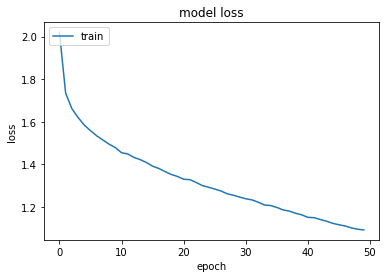

In [ ]:
#loss of the model_nn_3
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Few more experiments to go

1.   **Exploring more regularization techniques:** Try at least 2 regularization techniques separately and combined.  A non-exhaustive list of regularization techniques you can test


> * L1 and L2 regularization
* Early stopping
* Data augmentation
* Decreasing the complexity of the model

2.   **Hyperparameters' tuning:** Try to tune the learning parameters using the tuning strategies we learned about:

> * Learning rate
* Mini-batch size
* The optimizer and its parameters

3. Analyze the impact of each of the applied techniques. What were the most effective ones? What were the hypeparameters that affects the results the most?


In [ ]:
# Your code here

 - Regularization techniques:

- L1 & L2 :

In [23]:
 model_l2= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(3000, activation='LeakyReLU',kernel_regularizer='l2'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(1000, activation='LeakyReLU'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(10, activation='sigmoid',kernel_regularizer='l2'),
        
    ])

 model_l2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

 model_l2.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 19s 12ms/step - loss: 24.4821 - accuracy: 0.3965
Epoch 2/50
1563/1563 [==============================] - 18s 12ms/step - loss: 13.7268 - accuracy: 0.4667
Epoch 3/50
1563/1563 [==============================] - 18s 11ms/step - loss: 8.0609 - accuracy: 0.4844
Epoch 4/50
1563/1563 [==============================] - 18s 11ms/step - loss: 5.0374 - accuracy: 0.4998
Epoch 5/50
1563/1563 [==============================] - 18s 11ms/step - loss: 3.4276 - accuracy: 0.5024
Epoch 6/50
1563/1563 [==============================] - 18s 11ms/step - loss: 2.5598 - accuracy: 0.5135
Epoch 7/50
1563/1563 [==============================] - 18s 11ms/step - loss: 2.0933 - accuracy: 0.5165
Epoch 8/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8371 - accuracy: 0.5207
Epoch 9/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.7014 - accuracy: 0.5263
Epoch 10/50
1563/1563 [==============================] - 18s 1

- early stopping:

In [19]:
#early stopping:
model_erl= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(3072, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(10, activation='sigmoid'),
        #tf.keras.layers.Dropout(0.5)  
    ])

model_erl.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history_erl=model_erl.fit(X_train, y_train, epochs=50,callbacks=[callback] )

Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0274 - accuracy: 0.3145
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7355 - accuracy: 0.3853
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6629 - accuracy: 0.4086
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6254 - accuracy: 0.4203
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5884 - accuracy: 0.4330
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5598 - accuracy: 0.4416
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5341 - accuracy: 0.4535
Epoch 8/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5123 - accuracy: 0.4618
Epoch 9/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4952 - accuracy: 0.4638
Epoch 10/50
1563/1563 [==============================] - 13s 8ms/step - l

- Hyperparameters' tuning:


In [21]:
 model_hyp= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(3000, activation='LeakyReLU',kernel_regularizer='l2'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(1000, activation='LeakyReLU'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(10, activation='sigmoid',kernel_regularizer='l2'),
        
    ])
 lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer_1 = keras.optimizers.SGD(learning_rate=lr_schedule)

 model_hyp.compile(optimizer=optimizer_1,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

 model_hyp.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 19s 11ms/step - loss: 24.5229 - accuracy: 0.4003
Epoch 2/50
1563/1563 [==============================] - 18s 11ms/step - loss: 13.8674 - accuracy: 0.4660
Epoch 3/50
1563/1563 [==============================] - 18s 12ms/step - loss: 8.2624 - accuracy: 0.4870
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 5.2457 - accuracy: 0.4995
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 3.6034 - accuracy: 0.5111
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 2.7000 - accuracy: 0.5171
Epoch 7/50
1563/1563 [==============================] - 17s 11ms/step - loss: 2.1947 - accuracy: 0.5202
Epoch 8/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9023 - accuracy: 0.5296
Epoch 9/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7348 - accuracy: 0.5348
Epoch 10/50
1563/1563 [==============================] - 17s 1

In [26]:
#Evaluating the models:
model_l2.evaluate(X_test,y_test)
model_erl.evaluate(X_test,y_test)
model_hyp.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.5952 - accuracy: 0.5482


[1.5951582193374634, 0.5482000112533569]

***Analyse:***
- The most effective technique was the "early stopping" methode, but there was no overfitting.
- The "Learning rate" and " decay rate" were the hyperparameters that effects the most on the result in the train and perform bad in the test, it's just overfiting again!

## Answer the following questions
*Hint: Do your own research to answer these questions, none of the questions is answered in the previous lessons*


1.   Why we can’t reach a good accuracy on this task?
2.   Explain why fully connected neural networks are Not efficient on image tasks
3.   What architecture can be used  for such tasks? Why they are more adapted for that?

\

- We can't reach a good accuracy on this task because it's an image classification 
task, and fully connected neural perform bad at this

- the image has a large input, in this case we had 32x32x3, the model will calculated 3072 weight and bias, more complexity and without forgetting the high chance of overfitting

- CNNs(Convolution neural network) works better than fully connected networks for image processing, it will convert the large input to a lower one and this could be useful especially for image that had large number of pixels 